In [1]:
%matplotlib inline
import numpy as np

from qiskit import QuantumCircuit, IBMQ, execute, Aer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

0


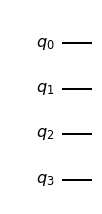

In [2]:
#creating the constant oracle

n = 3
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2)

print(output)

if output == 1:
    const_oracle.x(n)
    
const_oracle.draw('mpl')

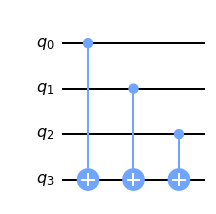

In [3]:
#creating balenced oracle

balenced_oracle = QuantumCircuit(n+1)

for qubit in range(n):
    balenced_oracle.cx(qubit, n)
    
balenced_oracle.draw('mpl')

<ipython-input-4-d0a0ced08603>:17: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balenced_oracle
C:\Users\sarth\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


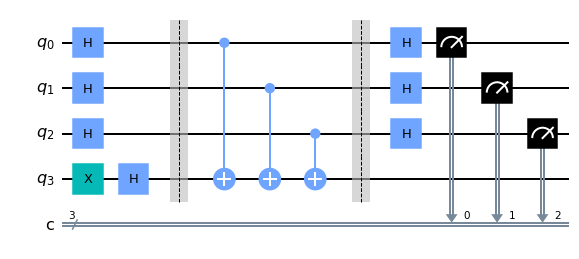

In [4]:
#creating a dj circuit

dj_circuit = QuantumCircuit(n+1, n)

#applying H gates to all qubits in first register
for qubit in range (n):
    dj_circuit.h(qubit)
    
#put qubit in 2nd register in |1> state
dj_circuit.x(n)
dj_circuit.h(n)

#place barrier
dj_circuit.barrier()

#add quantum oracle
dj_circuit += balenced_oracle

#place barrier
dj_circuit.barrier()

#apply h gates to qubits in forst register
for qubit in range (n):
    dj_circuit.h(qubit)
    
#measure
for i in range(n):
    dj_circuit.measure(i,i)
    
dj_circuit.draw('mpl')

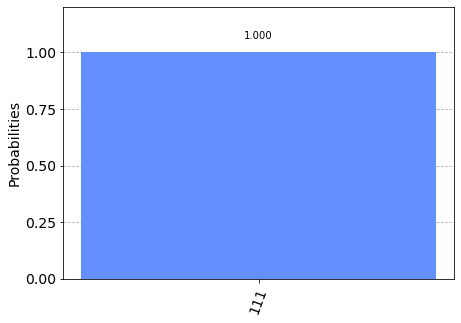

In [5]:
# use qasm simulator
qasm_sim = Aer.get_backend('qasm_simulator')

#set no of shots
shots = 1

#assemble quantum circuit
qobj = assemble(dj_circuit, qasm_sim)

#run the circuit on the simulator
results = qasm_sim.run(qobj).result()

#get counts
answer = results.get_counts()

plot_histogram(answer)

In [6]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub = "ibm-q")
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (n+1) and 
                                      not x.configuration().simulator and x.status().operational == True))

print(backend)

ibmq_belem


In [7]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval = 2)

<ipython-input-7-b89df22674d3>:6: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


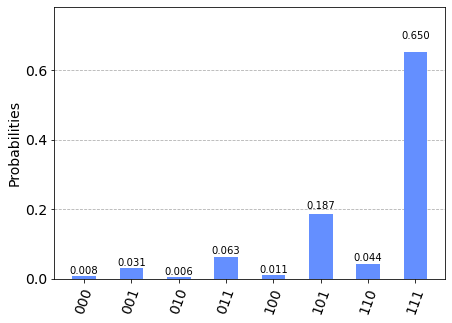

In [8]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)